<a href="https://colab.research.google.com/github/mebkdas/Python/blob/master/RegressionAnalysis_CA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import io 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
import seaborn as sns

**Import Dataset and Create Header**

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data')

#Creating Header for the dataset
header = ["Vendor-Name","Model-Name","MYCT","MMIN","MMAX","CACH","CHMIN","CHMAX","PRP","ERP"]

df.columns = header

#first 5 rows
print("First 5 rows of my dataset is : ")
df.head()

First 5 rows of my dataset is : 


,Vendor-Name,Model-Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


**Data Preprocessing**

In [ ]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [ ]:
df.replace("?",np.nan,inplace= True)

missing_data = df.isnull()
missing_data

print("Missing values in the dataset:",df.isnull().sum().max())

Missing values in the dataset: 0


**Observations:**
1.   There are no missing values in the dataset.
2.   There are 2 Categorical variables
*    Vendor,Model
3.   There are 8 Numerical variables
*    MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fddb33c5b00>,
      dtype=object)

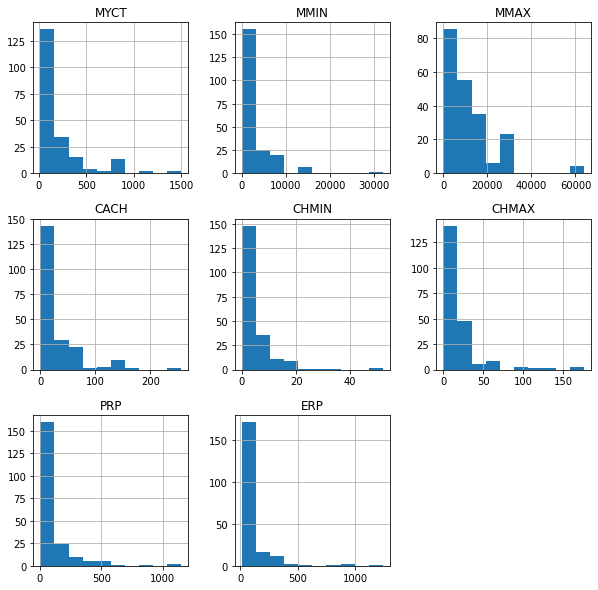

In [ ]:
#Create Histograms
df.hist(figsize=(10,10))

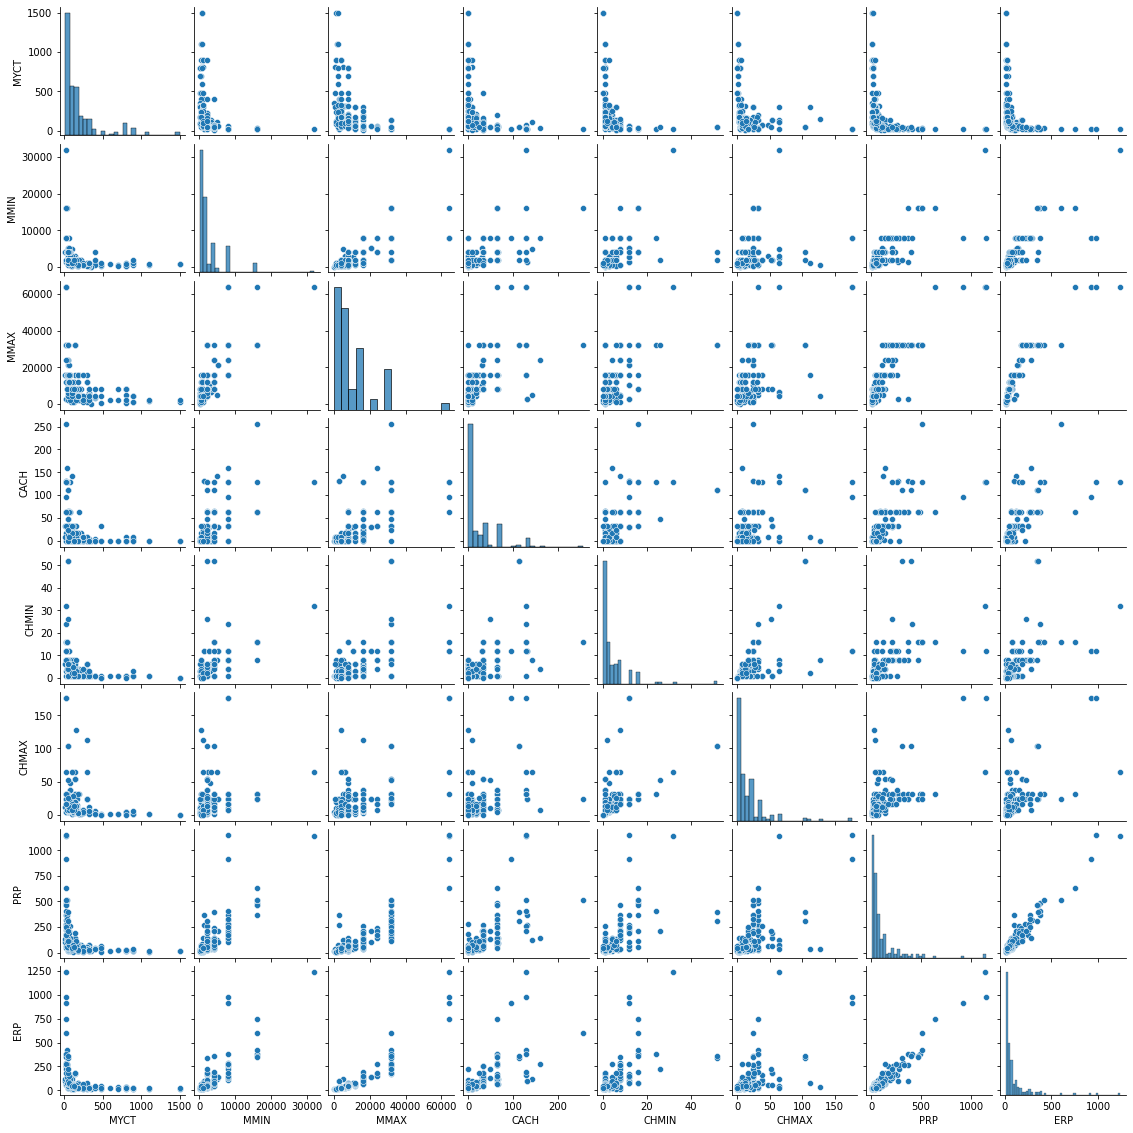

In [ ]:
#Graph the relationship between attributes
sns.pairplot(df, height = 2.0)

**Correlation and Relationships**

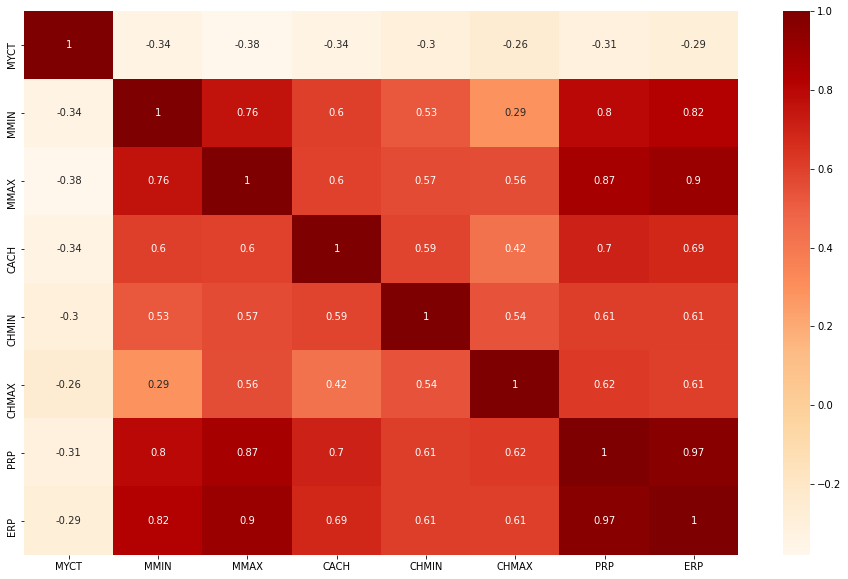

In [ ]:
#Create a subplot
ax, fig = plt.subplots(figsize=(16,10))

#Using pandas to generate a matrix
correlation_matrix = df.corr()

#Create a heatmap and make it shows the correlation annotation
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")

plt.show()

#Here we can see MYCT has the lowest correlation with other attributes
#Both ERP and PRP have strong correlationw with other attributes

The correlation between the numeric columns were calculated and observed in the below correlation plot.
(The right color bar indicated the correlation values. For example, dark red means correlation value 
 is 1 and light beige means correlation value is negative 0.25)



The graph shows that MMIN, MMAX, CACH, CHMIN, and CHMAX have strong positive correlation with the PRP of the CPU. On the other hand MYCT has a strong negative correlation with the PRP of the CPU.

In [ ]:
#This function will split the dataset into two sets
#The training set will be what the model trains on
#The test set will be the one we use to evaluate how well the model does 

from sklearn.model_selection import train_test_split

#We are dropping "Vendor Name" and "Model Name" because they are strings, and our model wouldn't work with strings. 
#We are dropping "PRP" because that is the factor we want to analyse.
#We are also dropping "ERP" because it was the author's previous prediction of the "PRP" which will allow for higher correlation but irrelevant for real world application

x = df.drop(["Vendor-Name", "Model-Name", "PRP", "ERP"], axis=1)

#we will use these 7 columns as the input model
x.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX
0,29,8000,32000,32,8,32
1,29,8000,32000,32,8,32
2,29,8000,32000,32,8,32
3,29,8000,16000,32,8,16
4,26,8000,32000,64,8,32


In [ ]:
#We choose to make the model to find the PRP (output) because it should have direct and strong correlation with the other factors.
y = df['PRP']
y.head()

0    269
1    220
2    172
3    132
4    318
Name: PRP, dtype: int64

In [ ]:
#pass in x (input set), y (output set), test_size (the percentage of our original dataset we want to use as the test set),
#and a random_state(to make sure we don't get the same answer everytime) as an argument to train_test_split.
#train_test_split returns 4 datasets: train_x, test_x, train_y, and test_y.
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state=42)

In [ ]:
#We will use LinearRegression because we will try to predict a real number and PRP is a continuous number
from sklearn.linear_model import LinearRegression

#Pick the Linear Regression model and instantiate it
model = LinearRegression()

In [ ]:
# Fit/build the model
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Show the 'm's (as in 'y = m*x + c') that the model learned from the data.
model.coef_

array([ 0.06201443,  0.01701267,  0.00478972,  1.19436032, -0.62702043,
        1.41408904])

In [ ]:
#Predict the y of text_x
predicted = model.predict(test_x)

Text(0, 0.5, 'predicted_PRP')

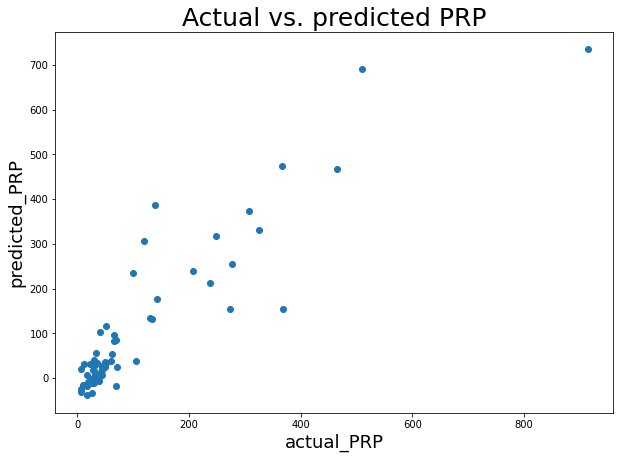

In [ ]:
#Make a plot to compare the test_y (actual result) with the Predicted result
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted PRP",fontsize=25)
plt.scatter(test_y,predicted)
plt.xlabel('actual_PRP',fontsize=18)
plt.ylabel('predicted_PRP',fontsize=18)

In [ ]:
# Gives the R^2 (coefficient of determination) of the model
#It shows how well the data fits the model.
model.score(test_x,test_y)

0.789606085279126

**Analysis**

n this analysis, a Linear Regression algorithm was used. These algorithms were trained with 70% of the data. Testing the model with the remaining 30% of the data yielded 0.738.

**Conclusion**

This analysis has shown that the PRP of a CPU can be confidently predicted from its MMIN, MMAX, CACH, CHMIN, CHMAX, and MYCT. In particular, the Linear Regression algorithm has a score of 74%.